In [1]:
# import libraries

import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from utils import *
from network import *

%matplotlib inline
np.random.seed(1)

In [2]:
# loading training and test sets
train_orig = pd.read_csv('../input/original_mnist/train.csv')
test = pd.read_csv('../input/original_mnist/test.csv')

In [3]:
# displaying the training set
train_orig

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# displaying the test set
test

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# randomly shuffle training data and create the dev set

train_shuffled = train_orig.iloc[np.random.permutation(train_orig.shape[0])]
train = train_shuffled.iloc[:50000, :]
dev = train_shuffled.iloc[50000:, :]

In [6]:
n = train.shape[1] - 1  # number of features
m_train = train.shape[0]  # number of training examples
m_dev = dev.shape[0]  # number of examples in dev set
m_test = test.shape[0]  # number of examples in test set
print(n, m_train, m_dev, m_test)

784 50000 10000 10000


In [7]:
# Separate features from labels

X_train = np.array(train.loc[:, 'pixel0':].T).reshape(n, m_train)
Y_train = np.array(train['label'].T).reshape(1, m_train)
X_dev = np.array(dev.loc[:, 'pixel0':].T).reshape(n, m_dev)
Y_dev = np.array(dev['label'].T).reshape(1, m_dev)
X_test = np.array(test.loc[:, 'pixel0':].T).reshape(n, m_test)
Y_test = np.array(test['label'].T).reshape(1, m_test)

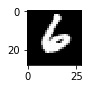

In [8]:
# visualize images (change index to visualize other images)

index = 15247
h, w = (28, 28)
plt.figure(figsize=(1, 1))
data = np.array(X_train[:, index].reshape(h, w), dtype=np.uint8)
img = Image.fromarray(data, mode='L')  # mode='L' for 8-bit pixels, black and white
plt.imshow(img, cmap='gray')

In [9]:
# normalize the X values

X_train = X_train / 255.0
X_dev = X_dev / 255.0
X_test = X_test / 255.0

In [10]:
# convert Y_train to equivalent one_hot_encoding

Y_train_one_hot = one_hot_encoding(Y_train, 10)  # num_of_output_units = 10
print(Y_train_one_hot.shape)

(10, 50000)


In [24]:
# create a neural network

nn = network([X_train.shape[0], 30, 30, 10], X_train, Y_train_one_hot)

In [25]:
# gradient descent

nn.nn_model(learning_rate=0.1, num_iter=3000)

Iteration 0 : 6.98085722858
Iteration 1 : 6.7850166325
Iteration 2 : 6.6178452459
Iteration 3 : 6.46186903159
Iteration 4 : 6.30919543225
Iteration 5 : 6.15293004079
Iteration 6 : 5.98334598925
Iteration 7 : 5.783638504
Iteration 8 : 5.52283834218
Iteration 9 : 5.14634265376
Iteration 10 : 4.58747632863
Iteration 11 : 3.90236314692
Iteration 12 : 3.45530520374
Iteration 13 : 3.36146378631
Iteration 14 : 3.35367636377
Iteration 15 : 3.35148315304
Iteration 16 : 3.34977192762
Iteration 17 : 3.3482571399
Iteration 18 : 3.34686513355
Iteration 19 : 3.34555942203
Iteration 20 : 3.34432023226
Iteration 21 : 3.34313621403
Iteration 22 : 3.34200037487
Iteration 23 : 3.34090803548
Iteration 24 : 3.33985578436
Iteration 25 : 3.33884093448
Iteration 26 : 3.33786123585
Iteration 27 : 3.33691472042
Iteration 28 : 3.33599961632
Iteration 29 : 3.33511429893
Iteration 30 : 3.3342572617
Iteration 31 : 3.3334270979
Iteration 32 : 3.33262248821
Iteration 33 : 3.33184219195
Iteration 34 : 3.33108504015
It

Iteration 278 : 3.26799049415
Iteration 279 : 3.26781257429
Iteration 280 : 3.2676346549
Iteration 281 : 3.267456732
Iteration 282 : 3.26727880157
Iteration 283 : 3.26710085956
Iteration 284 : 3.26692290195
Iteration 285 : 3.26674492468
Iteration 286 : 3.26656692366
Iteration 287 : 3.26638889482
Iteration 288 : 3.26621083404
Iteration 289 : 3.26603273722
Iteration 290 : 3.2658546002
Iteration 291 : 3.26567641885
Iteration 292 : 3.26549818898
Iteration 293 : 3.26531990641
Iteration 294 : 3.26514156693
Iteration 295 : 3.26496316632
Iteration 296 : 3.26478470032
Iteration 297 : 3.26460616469
Iteration 298 : 3.26442755512
Iteration 299 : 3.26424886732
Iteration 300 : 3.26407009695
Iteration 301 : 3.26389123968
Iteration 302 : 3.26371229113
Iteration 303 : 3.26353324691
Iteration 304 : 3.2633541026
Iteration 305 : 3.26317485377
Iteration 306 : 3.26299549595
Iteration 307 : 3.26281602467
Iteration 308 : 3.2626364354
Iteration 309 : 3.26245672361
Iteration 310 : 3.26227688475
Iteration 311 : 

Iteration 553 : 3.19275023785
Iteration 554 : 3.19214590049
Iteration 555 : 3.19153454424
Iteration 556 : 3.1909160267
Iteration 557 : 3.19029020161
Iteration 558 : 3.18965691872
Iteration 559 : 3.18901602369
Iteration 560 : 3.18836735792
Iteration 561 : 3.1877107584
Iteration 562 : 3.18704605761
Iteration 563 : 3.1863730833
Iteration 564 : 3.18569165837
Iteration 565 : 3.18500160068
Iteration 566 : 3.18430272292
Iteration 567 : 3.18359483235
Iteration 568 : 3.18287773068
Iteration 569 : 3.18215121383
Iteration 570 : 3.18141507176
Iteration 571 : 3.18066908737
Iteration 572 : 3.17991303304
Iteration 573 : 3.17914668496
Iteration 574 : 3.17836980689
Iteration 575 : 3.17758215531
Iteration 576 : 3.17678347303
Iteration 577 : 3.17597350679
Iteration 578 : 3.17515198603
Iteration 579 : 3.17431863864
Iteration 580 : 3.17347317842
Iteration 581 : 3.17261531182
Iteration 582 : 3.17174473136
Iteration 583 : 3.1708611107
Iteration 584 : 3.16996413647
Iteration 585 : 3.16905347708
Iteration 586 

Iteration 828 : 2.62933936451
Iteration 829 : 2.62758298512
Iteration 830 : 2.62581325359
Iteration 831 : 2.62402965715
Iteration 832 : 2.62223318247
Iteration 833 : 2.62042428769
Iteration 834 : 2.61860018374
Iteration 835 : 2.61676133396
Iteration 836 : 2.61490847626
Iteration 837 : 2.61304203485
Iteration 838 : 2.61115953716
Iteration 839 : 2.60926051548
Iteration 840 : 2.60734442791
Iteration 841 : 2.60541031484
Iteration 842 : 2.6034597662
Iteration 843 : 2.60148840205
Iteration 844 : 2.59949767006
Iteration 845 : 2.59748802869
Iteration 846 : 2.59545932741
Iteration 847 : 2.5934150429
Iteration 848 : 2.59135389425
Iteration 849 : 2.58927340876
Iteration 850 : 2.58717605263
Iteration 851 : 2.58505796767
Iteration 852 : 2.58292545017
Iteration 853 : 2.58077836035
Iteration 854 : 2.57861511141
Iteration 855 : 2.57643859165
Iteration 856 : 2.57425143591
Iteration 857 : 2.5720552441
Iteration 858 : 2.56984999877
Iteration 859 : 2.56763348051
Iteration 860 : 2.56540777718
Iteration 861

Iteration 1099 : 2.05960745693
Iteration 1100 : 2.05718492933
Iteration 1101 : 2.05473250161
Iteration 1102 : 2.05224807245
Iteration 1103 : 2.04973921415
Iteration 1104 : 2.04720474643
Iteration 1105 : 2.0446616823
Iteration 1106 : 2.04210550551
Iteration 1107 : 2.03958622455
Iteration 1108 : 2.0370750932
Iteration 1109 : 2.03471654142
Iteration 1110 : 2.03239230797
Iteration 1111 : 2.03054801866
Iteration 1112 : 2.02869309789
Iteration 1113 : 2.02820273202
Iteration 1114 : 2.02718250181
Iteration 1115 : 2.02988171463
Iteration 1116 : 2.02953516667
Iteration 1117 : 2.03857985423
Iteration 1118 : 2.03584344074
Iteration 1119 : 2.05384678995
Iteration 1120 : 2.04074002662
Iteration 1121 : 2.06450698436
Iteration 1122 : 2.03710194564
Iteration 1123 : 2.05881860508
Iteration 1124 : 2.02651860272
Iteration 1125 : 2.04260355538
Iteration 1126 : 2.01380453748
Iteration 1127 : 2.02481832668
Iteration 1128 : 2.00108587035
Iteration 1129 : 2.00843023824
Iteration 1130 : 1.98883251797
Iteration 

Iteration 1365 : 1.11663039725
Iteration 1366 : 1.1083618585
Iteration 1367 : 1.11231500647
Iteration 1368 : 1.10426553338
Iteration 1369 : 1.108078527
Iteration 1370 : 1.10024013174
Iteration 1371 : 1.10391052602
Iteration 1372 : 1.09627721563
Iteration 1373 : 1.09981800186
Iteration 1374 : 1.09236563941
Iteration 1375 : 1.09576633214
Iteration 1376 : 1.0885034903
Iteration 1377 : 1.09179371446
Iteration 1378 : 1.08469482105
Iteration 1379 : 1.08786041426
Iteration 1380 : 1.08093799164
Iteration 1381 : 1.08399040295
Iteration 1382 : 1.07722177547
Iteration 1383 : 1.08015642186
Iteration 1384 : 1.07355090564
Iteration 1385 : 1.07637335525
Iteration 1386 : 1.06991798631
Iteration 1387 : 1.07263046316
Iteration 1388 : 1.06632249112
Iteration 1389 : 1.06896159819
Iteration 1390 : 1.06278834189
Iteration 1391 : 1.06532764795
Iteration 1392 : 1.05927439091
Iteration 1393 : 1.06172945531
Iteration 1394 : 1.05578881314
Iteration 1395 : 1.05815042952
Iteration 1396 : 1.05234973032
Iteration 13

Iteration 1624 : 0.747546910126
Iteration 1625 : 0.747339448581
Iteration 1626 : 0.745496934151
Iteration 1627 : 0.745262091235
Iteration 1628 : 0.743441897991
Iteration 1629 : 0.743194389472
Iteration 1630 : 0.741393652157
Iteration 1631 : 0.741135497247
Iteration 1632 : 0.739341995657
Iteration 1633 : 0.73906974771
Iteration 1634 : 0.737295781076
Iteration 1635 : 0.737017962133
Iteration 1636 : 0.735263815497
Iteration 1637 : 0.73496941142
Iteration 1638 : 0.733235418842
Iteration 1639 : 0.732927746067
Iteration 1640 : 0.731209490412
Iteration 1641 : 0.730888033024
Iteration 1642 : 0.729187729045
Iteration 1643 : 0.728853833471
Iteration 1644 : 0.72718814342
Iteration 1645 : 0.726846826393
Iteration 1646 : 0.72519967882
Iteration 1647 : 0.724853382015
Iteration 1648 : 0.723228295731
Iteration 1649 : 0.72286855204
Iteration 1650 : 0.721291369121
Iteration 1651 : 0.720919018167
Iteration 1652 : 0.71935204618
Iteration 1653 : 0.718971137616
Iteration 1654 : 0.717447855007
Iteration 1655

Iteration 1881 : 0.566332179336
Iteration 1882 : 0.565866285353
Iteration 1883 : 0.565401304711
Iteration 1884 : 0.564937247632
Iteration 1885 : 0.564474411566
Iteration 1886 : 0.564013027563
Iteration 1887 : 0.5635528817
Iteration 1888 : 0.563094047671
Iteration 1889 : 0.562636636891
Iteration 1890 : 0.562180169635
Iteration 1891 : 0.561724805792
Iteration 1892 : 0.561270288844
Iteration 1893 : 0.560816854845
Iteration 1894 : 0.56036437889
Iteration 1895 : 0.559912970214
Iteration 1896 : 0.559462763738
Iteration 1897 : 0.559013328419
Iteration 1898 : 0.55856466979
Iteration 1899 : 0.55811727537
Iteration 1900 : 0.557670819009
Iteration 1901 : 0.55722560118
Iteration 1902 : 0.556781506252
Iteration 1903 : 0.556338705982
Iteration 1904 : 0.555896633691
Iteration 1905 : 0.555455426203
Iteration 1906 : 0.555014956378
Iteration 1907 : 0.554575535231
Iteration 1908 : 0.554137308446
Iteration 1909 : 0.553699837503
Iteration 1910 : 0.553263212732
Iteration 1911 : 0.552827575293
Iteration 1912

Iteration 2139 : 0.473265058338
Iteration 2140 : 0.472986529014
Iteration 2141 : 0.472708431787
Iteration 2142 : 0.472430574679
Iteration 2143 : 0.472153211688
Iteration 2144 : 0.471876318426
Iteration 2145 : 0.471599782388
Iteration 2146 : 0.471323687329
Iteration 2147 : 0.471047837935
Iteration 2148 : 0.470772658712
Iteration 2149 : 0.470498002808
Iteration 2150 : 0.470223714446
Iteration 2151 : 0.469949701209
Iteration 2152 : 0.469675852418
Iteration 2153 : 0.46940279589
Iteration 2154 : 0.4691301875
Iteration 2155 : 0.468857923596
Iteration 2156 : 0.46858611047
Iteration 2157 : 0.468314507156
Iteration 2158 : 0.468043188368
Iteration 2159 : 0.46777220048
Iteration 2160 : 0.467501428292
Iteration 2161 : 0.467231035511
Iteration 2162 : 0.466961190031
Iteration 2163 : 0.466692050794
Iteration 2164 : 0.46642342977
Iteration 2165 : 0.466154959236
Iteration 2166 : 0.465886962055
Iteration 2167 : 0.465619778827
Iteration 2168 : 0.465353002002
Iteration 2169 : 0.465086598432
Iteration 2170

Iteration 2396 : 0.41182149555
Iteration 2397 : 0.411612664983
Iteration 2398 : 0.411404004929
Iteration 2399 : 0.411195694749
Iteration 2400 : 0.410987507679
Iteration 2401 : 0.410779626935
Iteration 2402 : 0.410572108389
Iteration 2403 : 0.410364918102
Iteration 2404 : 0.410158027317
Iteration 2405 : 0.409951189201
Iteration 2406 : 0.409744667103
Iteration 2407 : 0.409538588606
Iteration 2408 : 0.409333011784
Iteration 2409 : 0.409127590272
Iteration 2410 : 0.40892230301
Iteration 2411 : 0.408716949875
Iteration 2412 : 0.408511842973
Iteration 2413 : 0.408306934558
Iteration 2414 : 0.408101912058
Iteration 2415 : 0.407896749084
Iteration 2416 : 0.407691627437
Iteration 2417 : 0.407486987236
Iteration 2418 : 0.407282503831
Iteration 2419 : 0.407078275728
Iteration 2420 : 0.406874028626
Iteration 2421 : 0.406669932736
Iteration 2422 : 0.406465937729
Iteration 2423 : 0.406262156964
Iteration 2424 : 0.406058478906
Iteration 2425 : 0.405855109713
Iteration 2426 : 0.405652035703
Iteration 

Iteration 2653 : 0.364106611824
Iteration 2654 : 0.363942462464
Iteration 2655 : 0.363778573321
Iteration 2656 : 0.363614792386
Iteration 2657 : 0.363451435178
Iteration 2658 : 0.363288352734
Iteration 2659 : 0.363125282051
Iteration 2660 : 0.362962385915
Iteration 2661 : 0.362799839956
Iteration 2662 : 0.362637381893
Iteration 2663 : 0.362475181145
Iteration 2664 : 0.362313204128
Iteration 2665 : 0.362151456465
Iteration 2666 : 0.361989969096
Iteration 2667 : 0.361828615281
Iteration 2668 : 0.361667516421
Iteration 2669 : 0.361506664646
Iteration 2670 : 0.36134598501
Iteration 2671 : 0.361185425362
Iteration 2672 : 0.361025235594
Iteration 2673 : 0.360865334195
Iteration 2674 : 0.360705724574
Iteration 2675 : 0.360546261332
Iteration 2676 : 0.360386793102
Iteration 2677 : 0.360227443544
Iteration 2678 : 0.360068299928
Iteration 2679 : 0.359909415567
Iteration 2680 : 0.359750661832
Iteration 2681 : 0.359592144019
Iteration 2682 : 0.359433917122
Iteration 2683 : 0.359275943364
Iteration

Iteration 2910 : 0.327179719461
Iteration 2911 : 0.327052832062
Iteration 2912 : 0.326926227618
Iteration 2913 : 0.326799771276
Iteration 2914 : 0.326673535701
Iteration 2915 : 0.326547613801
Iteration 2916 : 0.326421855256
Iteration 2917 : 0.326295949397
Iteration 2918 : 0.326169985156
Iteration 2919 : 0.326044027844
Iteration 2920 : 0.3259182736
Iteration 2921 : 0.325792755422
Iteration 2922 : 0.325667417344
Iteration 2923 : 0.325542199389
Iteration 2924 : 0.325417098778
Iteration 2925 : 0.325292008032
Iteration 2926 : 0.325167067738
Iteration 2927 : 0.325042305815
Iteration 2928 : 0.324917659863
Iteration 2929 : 0.324793173615
Iteration 2930 : 0.324668912821
Iteration 2931 : 0.324544847499
Iteration 2932 : 0.324420969209
Iteration 2933 : 0.324297253418
Iteration 2934 : 0.324173590408
Iteration 2935 : 0.32405011503
Iteration 2936 : 0.323926801181
Iteration 2937 : 0.323803546918
Iteration 2938 : 0.323680491255
Iteration 2939 : 0.323557647337
Iteration 2940 : 0.323434924208
Iteration 2

In [26]:
# save parameters
nn.store_parameters()

Enter filename : 2_hl_30_hu_each


In [27]:
# load parameters
filename = '../output/2_hl_30_hu_each.npz'  # with .npz extension
nn.load_parameters(filename)

NN layer sizes: [784  30  30  10]


In [28]:
# prediction of labels

Y_hat_train_one_hot = nn.predict(X_train)
Y_hat_train = np.argmax(Y_hat_train_one_hot, axis=0).reshape(1, m_train)
Y_hat_dev_one_hot = nn.predict(X_dev)
Y_hat_dev = np.argmax(Y_hat_dev_one_hot, axis=0).reshape(1, m_dev)
Y_hat_test_one_hot = nn.predict(X_test)
Y_hat_test = np.argmax(Y_hat_test_one_hot, axis=0).reshape(1, m_test)

In [29]:
# print accuracy on the dev set

print('Training set accuracy :', score(Y_hat_train, Y_train) * 100, '%')
print('Dev set accuracy :', score(Y_hat_dev, Y_dev) * 100, '%')
print('Test set accuracy :', score(Y_hat_test, Y_test) * 100, '%')

Training set accuracy : 95.534 %
Dev set accuracy : 94.7 %
Test set accuracy : 95.24 %
